In [15]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
from scipy.fftpack import fft
import sounddevice as sd
from scipy.signal.windows import hann, hamming
from scipy.signal import freqz

from audiolazy import lazy_lpc as lpc

In [6]:
# provided functions
def est_predictor_gain(x, a, p):
    '''
    A function to compute gain of the residual signal in LP analysis.
    x:  signal 
    a: LPC coefficients
    p: order of the filter
    '''
    cor = np.correlate(x, x, mode='full')
    
    rr = cor[len(cor)//2: len(cor)//2+p+1]
    g = np.sqrt(np.sum(a*rr))
    return g

   
    
def reject_outliers(data, m=2):
    '''
    Function to reject outliers. All values beyond m standard deviations from mean are excluded
    '''
    return data[abs(data - np.mean(data)) < m * np.std(data)]

### 1. Linear prediction analysis. (1 point) 

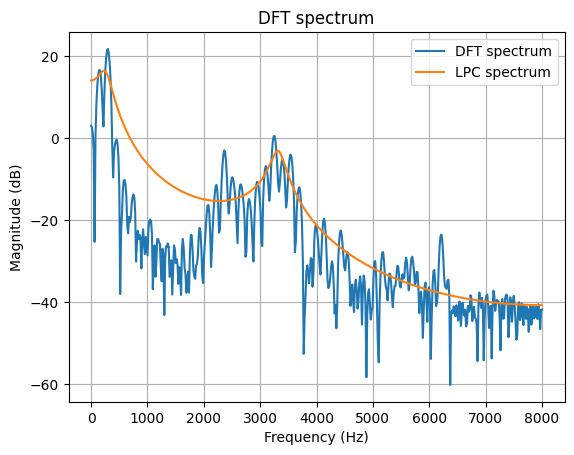

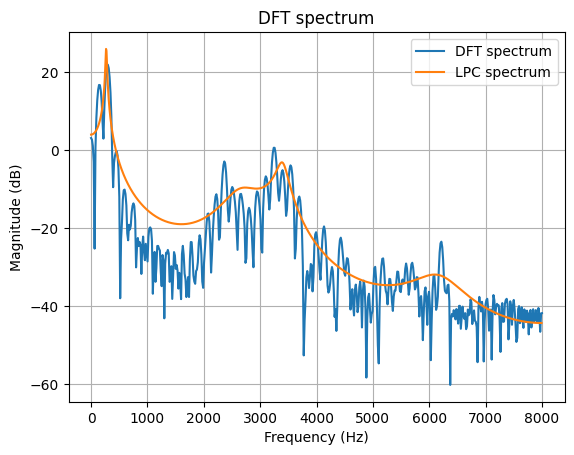

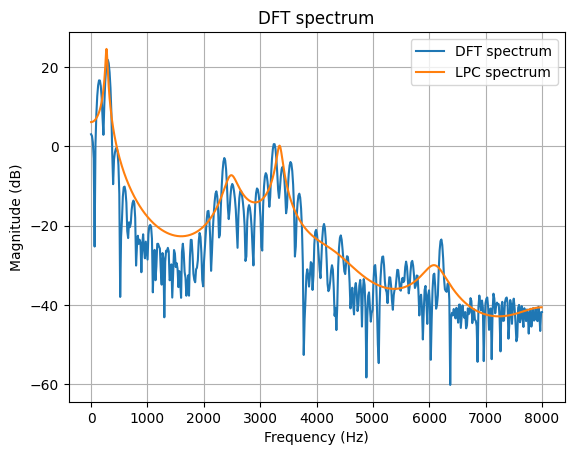

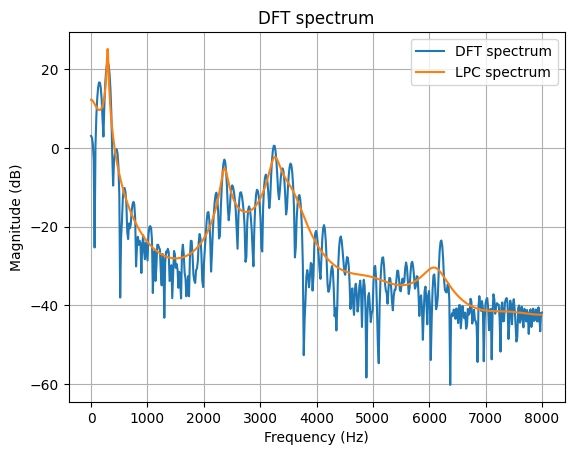

In [21]:
# Read audio
audioIn, fs = lb.load('i.wav', sr=None)   


# d) has to be tuned
p_d = [4, 8, 12, 16]


# number of DFT points
nfft = 1024


inInd =0
wLen = int(0.02*fs) # 20 ms window

win = hamming(wLen) # hamming window for example


cnt = 0
numframes = np.ceil( (len(audioIn)-wLen)/(wLen/2)) # number of franes 
# A placeholder for storing formants
formants = np.zeros((len(p_d), int(numframes), 2))

                                     

# choose a representative frame of the vowel
plot_frame = int(numframes/2)  # middle of the vowel
for p in p_d:
    
    cnt = 0
    inInd = 0
    # The analysis loop
    while inInd< len(audioIn)-wLen:
        # audio frame
        frame = audioIn[inInd:inInd+wLen]* win
        
        
        # a) compute LPC and gain using audiolazy library
        a = np.array(lpc.lpc.autocor(frame, p).numerator)
        g = est_predictor_gain(frame, a, p)
        
    
        
        # b) Compute the filter tansfer function using scipy.signal.freqz
        w, h = freqz(g, a, worN=nfft, fs=fs)
    
        
        # Compute DFT spectrum
        X = 20*np.log10( np.abs(fft(frame, nfft)[0:int(nfft/2)]) )
        
        inInd = inInd + int(wLen/2) # frame advance
        
        cnt += 1
        
        
        # c) Select a frame and plot the FFT spectrum and LPC spectrum in the same figure
        if cnt == plot_frame :
            # plot DFT spectrum (remember both in dB scale)
            plt.figure()
            plt.plot(np.linspace(0,fs/2,len(X)), X, label = 'DFT spectrum')
            plt.plot(w, 20*np.log10(np.abs(h)), label = 'LPC spectrum')
            plt.title('DFT spectrum')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude (dB)')
            plt.legend()
            plt.grid()
            plt.show
        
        
        

#### d) Comment of the connection between lpc model order and peaks in the DFT spectrum.

In [ ]:
#As the LPC order increases, the peaks matches better with DFT spectrum

#### Is the best order selection dependent on the vowel or not?

In [ ]:
#No, for all vowels, as the order increases, the aproximation gets better

### 2. Formant analysis. (1 point)

#### Add more steps in the previous analysis loop

In [ ]:
# Read audio
audioIn, fs = lb.load('audio.wav', sr=None)   

# filter order
p = 4  # d) has to be tuned

# number of DFT points
nfft = 1024

inInd =0
wLen = int(0.02*fs) # 20 ms window
win = hamming(wLen) # hamming window for example

cnt = 0
numframes = np.ceil( (len(audioIn)-wLen)/(wLen/2)) # number of franes 
formants  = []                                     # A placeholder for storing formants

# choose a representative frame of the vowel
plot_frame = int(numframes/2)  # middle of the vowel

# The analysis loop
while inInd< len(audioIn)-wLen:
    # audio frame
    frame = audioIn[inInd:inInd+wLen]* win
    
    
    # Compute LPC and gain using audiolazy library
    
 
    # Compute the filter tansfer function using scipy.signal.freqz
 
    
    # Compute DFT spectrum
    
    
    # a) Compute roots (np.roots)
       
 
    # LPC coefficients are real-valued, the roots occur in complex conjugate pairs.
    # Retain only the roots with +ve sign for the imaginary part 
    
    
    # b.1) compute formants from roots (np.angle)
    

    # convert to Hertz from angular frequencies
    angz = angz*(fs/(2*np.pi))

    # sort the formants in increasing order
    angz = np.sort(angz)
    
    # remove zero frequencies
    angz = angz[angz !=0]
    
    # b.2) Save first three formants
    formants.append(angz[:3]) 
    
    inInd = inInd + int(wLen/2) # frame advance
       

        

formants = np.array(formants)
# b.3) For each separate vowel calculate average formant frequencies
print('------ The computed formants are :', np.mean(formants, 0))

# Refine formant estimations (optional)

#### b.4) Compare the obtained values with the indicative values. 

### Bonus problem: What happens if you apply LPC to the oboe sound? What are the corresponding "formants"?